# BIRD SPECIES CLASSIFICATION with DEEP LEARNING

<p style="text-align:center;"><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR-zuTVRKn8MQ4ZiHcK-WU1QoCzoYw_V7Yh9g&usqp=CAU" alt="Girl in a jacket" width="500" height="600" class="center"></p>

**Project Overview**

It is a project that uses transfer learning to predict 400 classes belonging to bird species. Data set of 400 bird species.58388 training images, 2000 test images(5 images per species) and 2000 validation images(5 images per species. This is a very high quality dataset where there is only one bird in each image and the bird typically takes up at least 50% of the pixels in the image. As a result even a moderatly complex model will achieve training and test accuracies in the mid 90% range.

To become one with data is significant in such projects. Therefore, visualization techniques are usually applied in the project. A pre-trained model of Keras (InceptionV3) is  used in the project. After reachin nearly %89 accuracy, fine-tuning is applied and the accuracy is improved to **%94**.

Steps followed during the development of the project:

* 1. Become One with Data
* 2. Data Preprocessing
* 3. Create a and fit the Model (Using InceptionV3 pre-trained model)
* 4. Freeze top layers of Base Model
* 5. Fine-tuning and Refitting 
* 6. Making some predictions



## 1. Become one with the data

In [87]:
import os 

#walk through the directory and list the numbers of files
for dirpath, dirnames, filenames in os.walk("/kaggle/input/100-bird-species"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 4 directories and 5 images in /kaggle/input/100-bird-species
There are 400 directories and 0 images in /kaggle/input/100-bird-species/valid
There are 0 directories and 5 images in /kaggle/input/100-bird-species/valid/WATTLED CURASSOW
There are 0 directories and 5 images in /kaggle/input/100-bird-species/valid/CARMINE BEE-EATER
There are 0 directories and 5 images in /kaggle/input/100-bird-species/valid/GAMBELS QUAIL
There are 0 directories and 5 images in /kaggle/input/100-bird-species/valid/UMBRELLA BIRD
There are 0 directories and 5 images in /kaggle/input/100-bird-species/valid/AMERICAN KESTREL
There are 0 directories and 5 images in /kaggle/input/100-bird-species/valid/AMERICAN GOLDFINCH
There are 0 directories and 5 images in /kaggle/input/100-bird-species/valid/DUSKY LORY
There are 0 directories and 5 images in /kaggle/input/100-bird-species/valid/BLACK THROATED WARBLER
There are 0 directories and 5 images in /kaggle/input/100-bird-species/valid/YELLOW CACIQUE
There are

##### How many classes do we have?

In [41]:
num_of_bird_groups = len(os.listdir("/kaggle/input/100-bird-species/train"))
num_of_bird_groups

400

##### What are the class names?

In [42]:
import pathlib 
import numpy as np

data_dir = pathlib.Path("/kaggle/input/100-bird-species/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # creating a list of class names from subdirectory 
print(class_names)

['ABBOTTS BABBLER' 'ABBOTTS BOOBY' 'ABYSSINIAN GROUND HORNBILL'
 'AFRICAN CROWNED CRANE' 'AFRICAN EMERALD CUCKOO' 'AFRICAN FIREFINCH'
 'AFRICAN OYSTER CATCHER' 'ALBATROSS' 'ALBERTS TOWHEE'
 'ALEXANDRINE PARAKEET' 'ALPINE CHOUGH' 'ALTAMIRA YELLOWTHROAT'
 'AMERICAN AVOCET' 'AMERICAN BITTERN' 'AMERICAN COOT' 'AMERICAN GOLDFINCH'
 'AMERICAN KESTREL' 'AMERICAN PIPIT' 'AMERICAN REDSTART'
 'AMETHYST WOODSTAR' 'ANDEAN GOOSE' 'ANDEAN LAPWING' 'ANDEAN SISKIN'
 'ANHINGA' 'ANIANIAU' 'ANNAS HUMMINGBIRD' 'ANTBIRD' 'ANTILLEAN EUPHONIA'
 'APAPANE' 'APOSTLEBIRD' 'ARARIPE MANAKIN' 'ASHY THRUSHBIRD'
 'ASIAN CRESTED IBIS' 'AVADAVAT' 'AZURE JAY' 'AZURE TANAGER' 'AZURE TIT'
 'BAIKAL TEAL' 'BALD EAGLE' 'BALD IBIS' 'BALI STARLING' 'BALTIMORE ORIOLE'
 'BANANAQUIT' 'BAND TAILED GUAN' 'BANDED BROADBILL' 'BANDED PITA'
 'BANDED STILT' 'BAR-TAILED GODWIT' 'BARN OWL' 'BARN SWALLOW'
 'BARRED PUFFBIRD' 'BARROWS GOLDENEYE' 'BAY-BREASTED WARBLER'
 'BEARDED BARBET' 'BEARDED BELLBIRD' 'BEARDED REEDLING'
 'BELTED KINGFISHE

##### A function to visualize images randomly

In [43]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # setting up the image directory
  target_folder = target_dir + target_class

  #get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  #read image and plotting it
  img = mpimg.imread(target_folder + "/" + random_image[0] )
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")
  
  return img

Image shape: (224, 224, 3)


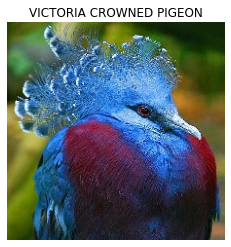

In [44]:
img = view_random_image(target_dir = "/kaggle/input/100-bird-species/train/",
                        target_class = "VICTORIA CROWNED PIGEON") # or we can write nike instead of converse to see converse examples

In [45]:
import tensorflow as tf
img.shape #(width, height, colour channels)

(224, 224, 3)

##### More visualization :D

Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)


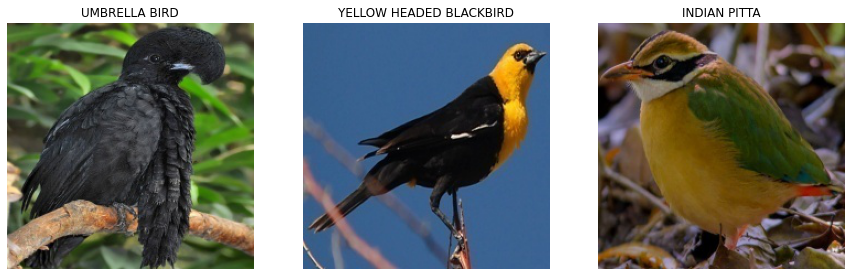

In [46]:
plt.figure(figsize = (15,7))
plt.subplot(1,3,1)
steak_image = view_random_image("/kaggle/input/100-bird-species/train/", "UMBRELLA BIRD")
plt.subplot(1,3,2)
pizza_image = view_random_image("/kaggle/input/100-bird-species/train/", "YELLOW HEADED BLACKBIRD")
plt.subplot(1,3,3)
pizza_image = view_random_image("/kaggle/input/100-bird-species/train/", "INDIAN PITTA")

## 2. Data Preprocessing

In [47]:
import matplotlib.pyplot as plt
import pathlib, os, random
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow as tf

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential

In [53]:
train_dir = "/kaggle/input/100-bird-species/train/"
test_dir = "/kaggle/input/100-bird-species/test/"
val_dir = "/kaggle/input/100-bird-species/valid/"

In [61]:
# Rescale
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# data transfer from directories to batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size= 32,
                                               target_size= (300,300),
                                               class_mode = "categorical")

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (300,300),
                                               class_mode = "categorical")

val_data = valid_datagen.flow_from_directory(directory = val_dir,
                                               batch_size = 32,
                                               target_size = (300,300),
                                               class_mode = "categorical")


Found 58388 images belonging to 400 classes.
Found 2000 images belonging to 400 classes.
Found 2000 images belonging to 400 classes.


## 3.Creating and fitting the Model

In [64]:
# 1. Create a base model with tf.keras.applications

base_model = tf.keras.applications.InceptionV3(include_top= False,)

# 2. Freeze the base model
base_model.trainable = False

#3. Create inputs into models
inputs = tf.keras.layers.Input(shape =(300,300,3), name = "input-layer")

#4. Rescaling
#x = tf.keras.layers.experimental.preprocessing.Rescaling(1/255.)(inputs)

#5. Pass the inputs 
x = base_model(inputs)
print(f"Shape after passing inputs through base model: {x.shape}")

# 6. Average pool the outputs of the base model
x = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pooling_layer")(x)
print(f"Shape after GlobalAveragePooling2D: {x.shape}")

#7. Create the output activation layer
outputs = tf.keras.layers.Dense(400, activation = "softmax", name = "output-layer")(x)

# 8. Combine the inputs with outputs into a model
model_0 = tf.keras.Model(inputs, outputs)

# 9. Compile the model
model_0.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                metrics = ["accuracy"])


history = model_0.fit(train_data,
                                 epochs=10,
                                 steps_per_epoch = len(train_data),
                                 validation_data = val_data,
                                 validation_steps = int(0.25*len(val_data)),)

Shape after passing inputs through base model: (None, 8, 8, 2048)
Shape after GlobalAveragePooling2D: (None, 2048)
Epoch 1/10
1825/1825 [==============================] - 520s 283ms/step - loss: 3.9994 - accuracy: 0.5496 - val_loss: 1.9122 - val_accuracy: 0.7646
Epoch 2/10
1825/1825 [==============================] - 287s 157ms/step - loss: 2.5615 - accuracy: 0.7364 - val_loss: 2.1382 - val_accuracy: 0.7875
Epoch 3/10
1825/1825 [==============================] - 287s 157ms/step - loss: 2.1221 - accuracy: 0.7923 - val_loss: 2.1917 - val_accuracy: 0.7937
Epoch 4/10
1825/1825 [==============================] - 286s 156ms/step - loss: 1.7922 - accuracy: 0.8276 - val_loss: 1.7769 - val_accuracy: 0.8229
Epoch 5/10
1825/1825 [==============================] - 277s 152ms/step - loss: 1.5327 - accuracy: 0.8538 - val_loss: 1.4853 - val_accuracy: 0.8625
Epoch 6/10
1825/1825 [==============================] - 285s 156ms/step - loss: 1.4356 - accuracy: 0.8683 - val_loss: 1.3764 - val_accuracy: 0.87

In [65]:
model_0.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input-layer (InputLayer)     [(None, 300, 300, 3)]     0         
_________________________________________________________________
inception_v3 (Functional)    (None, None, None, 2048)  21802784  
_________________________________________________________________
global_average_pooling_layer (None, 2048)              0         
_________________________________________________________________
output-layer (Dense)         (None, 400)               819600    
Total params: 22,622,384
Trainable params: 819,600
Non-trainable params: 21,802,784
_________________________________________________________________


In [68]:
model_0.evaluate(test_data)

63/63 [==============================] - 20s 312ms/step - loss: 1.3931 - accuracy: 0.8895


[1.3930977582931519, 0.8895000219345093]

In [66]:
def plot_loss_curves(history):

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  #plot loss
  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #plot accuracy
  plt.figure() 
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

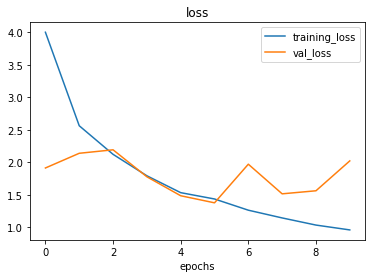

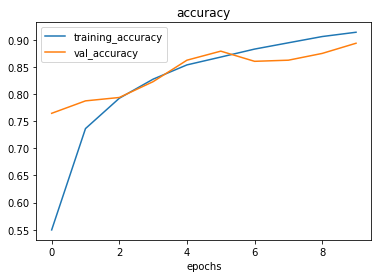

In [67]:
plot_loss_curves(history)

## 4. Freeze top layers of Base Model

In [75]:
# To begin fine-tuning lets start by setting the last 10 layers as trainable

base_model.trainable = True

# Un-freeze last 10 layers
for layer in base_model.layers[:-10]:
  layer.trainable = False

# Recompile (we have to compile model every time there is a change)
model_0.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), # when fine-tuning you typically want to lower lr by 10x
                 metrics = ["accuracy"] )

In [76]:
# Check which layers are trainable
for layer_number, layer in enumerate(model_0.layers[1].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_11 False
1 conv2d_282 False
2 batch_normalization_282 False
3 activation_282 False
4 conv2d_283 False
5 batch_normalization_283 False
6 activation_283 False
7 conv2d_284 False
8 batch_normalization_284 False
9 activation_284 False
10 max_pooling2d_30 False
11 conv2d_285 False
12 batch_normalization_285 False
13 activation_285 False
14 conv2d_286 False
15 batch_normalization_286 False
16 activation_286 False
17 max_pooling2d_31 False
18 conv2d_290 False
19 batch_normalization_290 False
20 activation_290 False
21 conv2d_288 False
22 conv2d_291 False
23 batch_normalization_288 False
24 batch_normalization_291 False
25 activation_288 False
26 activation_291 False
27 average_pooling2d_27 False
28 conv2d_287 False
29 conv2d_289 False
30 conv2d_292 False
31 conv2d_293 False
32 batch_normalization_287 False
33 batch_normalization_289 False
34 batch_normalization_292 False
35 batch_normalization_293 False
36 activation_287 False
37 activation_289 False
38 activation_292 False
39 activat

In [77]:
# Now we have unfrozen some of the layers on the top 
print(len(model_0.trainable_variables))

3


## 5. Fine-Tuning and Refitting

In [78]:
initial_epochs = 10
fine_tune_epochs = initial_epochs + 1

# Refit the model
history_2 = model_0.fit(train_data,
                       epochs = fine_tune_epochs,
                       validation_data = val_data,
                       validation_steps = int(0.25*len(val_data)),
                       initial_epoch =  history.epoch[-1],) # Start the epoch where it left before

Epoch 10/11
1825/1825 [==============================] - 263s 142ms/step - loss: 0.0454 - accuracy: 0.9915 - val_loss: 0.7194 - val_accuracy: 0.9417
Epoch 11/11
1825/1825 [==============================] - 260s 143ms/step - loss: 0.0310 - accuracy: 0.9938 - val_loss: 0.6178 - val_accuracy: 0.9438


In [79]:
model_0.evaluate(test_data)

63/63 [==============================] - 10s 160ms/step - loss: 0.4370 - accuracy: 0.9525


[0.4369608759880066, 0.9524999856948853]

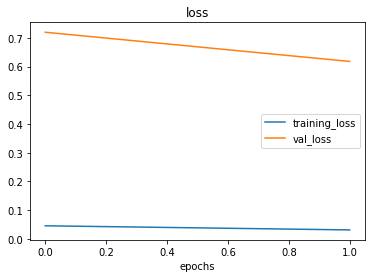

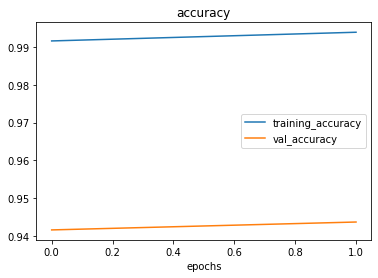

In [80]:
plot_loss_curves(history_2)

## 6. Making some predictions

In [84]:
# cReating a function that preprocess the custom data

def load_and_prep_image(filename, img_shape = 300):
  img = tf.io.read_file(filename) #read image
  img = tf.image.decode_image(img) # decode the image to a tensor
  img = tf.image.resize(img, size = [img_shape, img_shape]) # resize the image
  img = img/255. # rescale the image
  return img

In [85]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

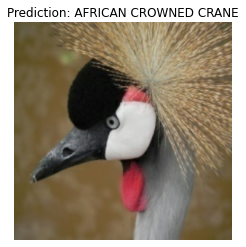

In [90]:
pred_and_plot(model_0, "/kaggle/input/100-bird-species/images to test/14.jpg", class_names)

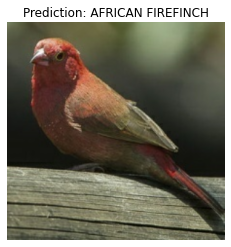

In [89]:
pred_and_plot(model_0, "/kaggle/input/100-bird-species/images to test/1.jpg", class_names)

<p style="text-align:center;">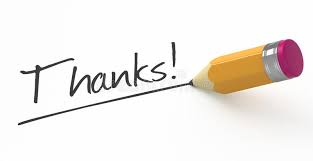</p>


**If you find the work beneficial, upvote it! I expect your feedbacks on the project. Thanks, Emre**